# Install and load required librares

To easily install all required libraries, run the following:

`!pip install -r requirements.txt`

The script needs the following 4 parameters if you're importing from brandwatch or crimson hexagon. To import data from sources without CH or BW fields, see the custom import instructions below.

In [ ]:
import os
import pandas as pd
from run_ccd import run_custom_ccd

In [2]:
# path to the data directory: e.g. "../input/"
input_path = "/Users/christian.conroy/OneDrive - Accenture Federal Services/Documents/Behavioral Analytics/ucis_tech_chall/mock_before/data/twitter_transparency/hashed/smaller/"
# number of rows to skip (if none, leave as 0)
skiprows = 0

# path to data output directory: e.g. "../output/"
output_path = "/Users/christian.conroy/OneDrive - Accenture Federal Services/Documents/Behavioral Analytics/ucis_tech_chall/mock_before/data/twitter_transparency/output/hashed/"

# type of import: options are ['brandwatch', 'crimson', 'rtweet']
# if you'd like to import in another format, see instructions below.
import_type = "rtweet"

Run the algorithm and send outputs to output_path

# Custom Import

A custom import will require that you read the data into python yourself and store it as a pandas dataframe. Then you'll need to verify the following column names are in your dataset:

`text` : column containing tweet text  
`screen_name` : column containing tweet authors  
`created_at` : column containing the date and time the tweet was posted  
`post_id` : a unique string identifier for each tweet  

Once you have a dataset with (at least) these columns imported, you can run:


In [4]:
def transp_import(filepath):
    """
    Used to load in data from Twitter Transparency Data Set.  The function will take any number of files and will merge them 
    into a single data frame as long as they are in the same folder.  The function will then transform the data to the correct structure and
    normalize the text field.  It will also drop all authors (nodes) with less than 2 tweets.  It finishes by optionally running the language translation
    services.

    """
    
    filelist = list()
    for (dirpath, dirnames, filenames) in os.walk(filepath):
        filelist+= [os.path.join(dirpath, file) for file in filenames]

    filelist = [ x for x in filelist if "users" not in x ]
    filelist = [ x for x in filelist if "DS_Store" not in x ]
    
    list_of_dfs = [pd.read_csv(flist) for flist in
                   filelist]
    df = pd.concat(list_of_dfs, ignore_index=True)
    
    df = df.rename(columns={'tweetid': 'post_id', 'user_screen_name': 'screen_name', 'tweet_time': 'created_at', 'tweet_text': 'text'})
    
    df = df[['screen_name', 'created_at', 'text', 'post_id']]
    
    #df.columns = df.columns.str.replace('\'','') 
    
    # Combine post and retweet
   # df['text'] = df['content']
    
     #Data loaded output summary
    print('Data loaded in: ', len(df), " rows")

    return df

In [5]:
df = transp_import(input_path)

Data loaded in:  67193  rows


In [6]:
pd.set_option('display.max_columns', None)
df.head()

screen_name        created_at  \
0    Dauog8ymHFUXSKwzt8naraYR6e4jM0+ICMvAW6WF4=  2021-03-18 13:15   
1  wwqN85E4TpJz940ZhGMXT9hHzaZktIMHhKzO5MEtrQ8=  2021-01-21 12:16   
2    L79Sf+PJs22opJ9XcbIvayfuQBz7Jh6IicSFlb5pk=  2021-03-29 13:04   
3  ZGzDnZFhF3JZpFxFh8nnpaIFi93lpbC7piph1DV8Vjw=  2021-01-20 09:37   
4  ARGkwKKMG5YzTvpSYdmiPiPNeab1sDTY5XobIkyYAlw=  2021-02-21 12:38   

                                                text              post_id  
0  Top political advisor stresses enduring stabil...  1372537056165949449  
1  Vocational education and training is key measu...  1352228496928489473  
2  Live: China's Foreign Ministry holds press con...  1376520717101981698  
3  #Xinjiang #XinjiangOnline Vocational education...  1351826176948449281  
4  stories from #Xinjiang: Pamir bride and painte...  1363468069587230722

Run the algorithm and send outputs to output_path

keeping authors with at least 4 posts
keeping tweets that appeared at least 5 times
Calculating weights...

Finding optimal clusters:
cluster: 10, mse: 0.0005612320694878048, silhouette: 0.06151553197650926
cluster: 12, mse: 0.0005287106804809014, silhouette: 0.053957500078045235
cluster: 14, mse: 0.000495919184222509, silhouette: 0.0655081358037434
cluster: 16, mse: 0.00046557544286676374, silhouette: 0.07845622675037886
cluster: 18, mse: 0.00043629054568962135, silhouette: 0.07483194351094279
cluster: 20, mse: 0.0004105841157465933, silhouette: 0.07742501716725426
cluster: 22, mse: 0.00038705144479029793, silhouette: 0.04876856010565733
cluster: 24, mse: 0.0003660734566247669, silhouette: 0.049657378238575106
Silhouette Optimal number of clusters: 22
Decomposing with optimal cluster number...

only one author in cluster 2 - cannot visualize
Authors at this threshhold co-tweeted at least 14 times
Updated script!
Done!


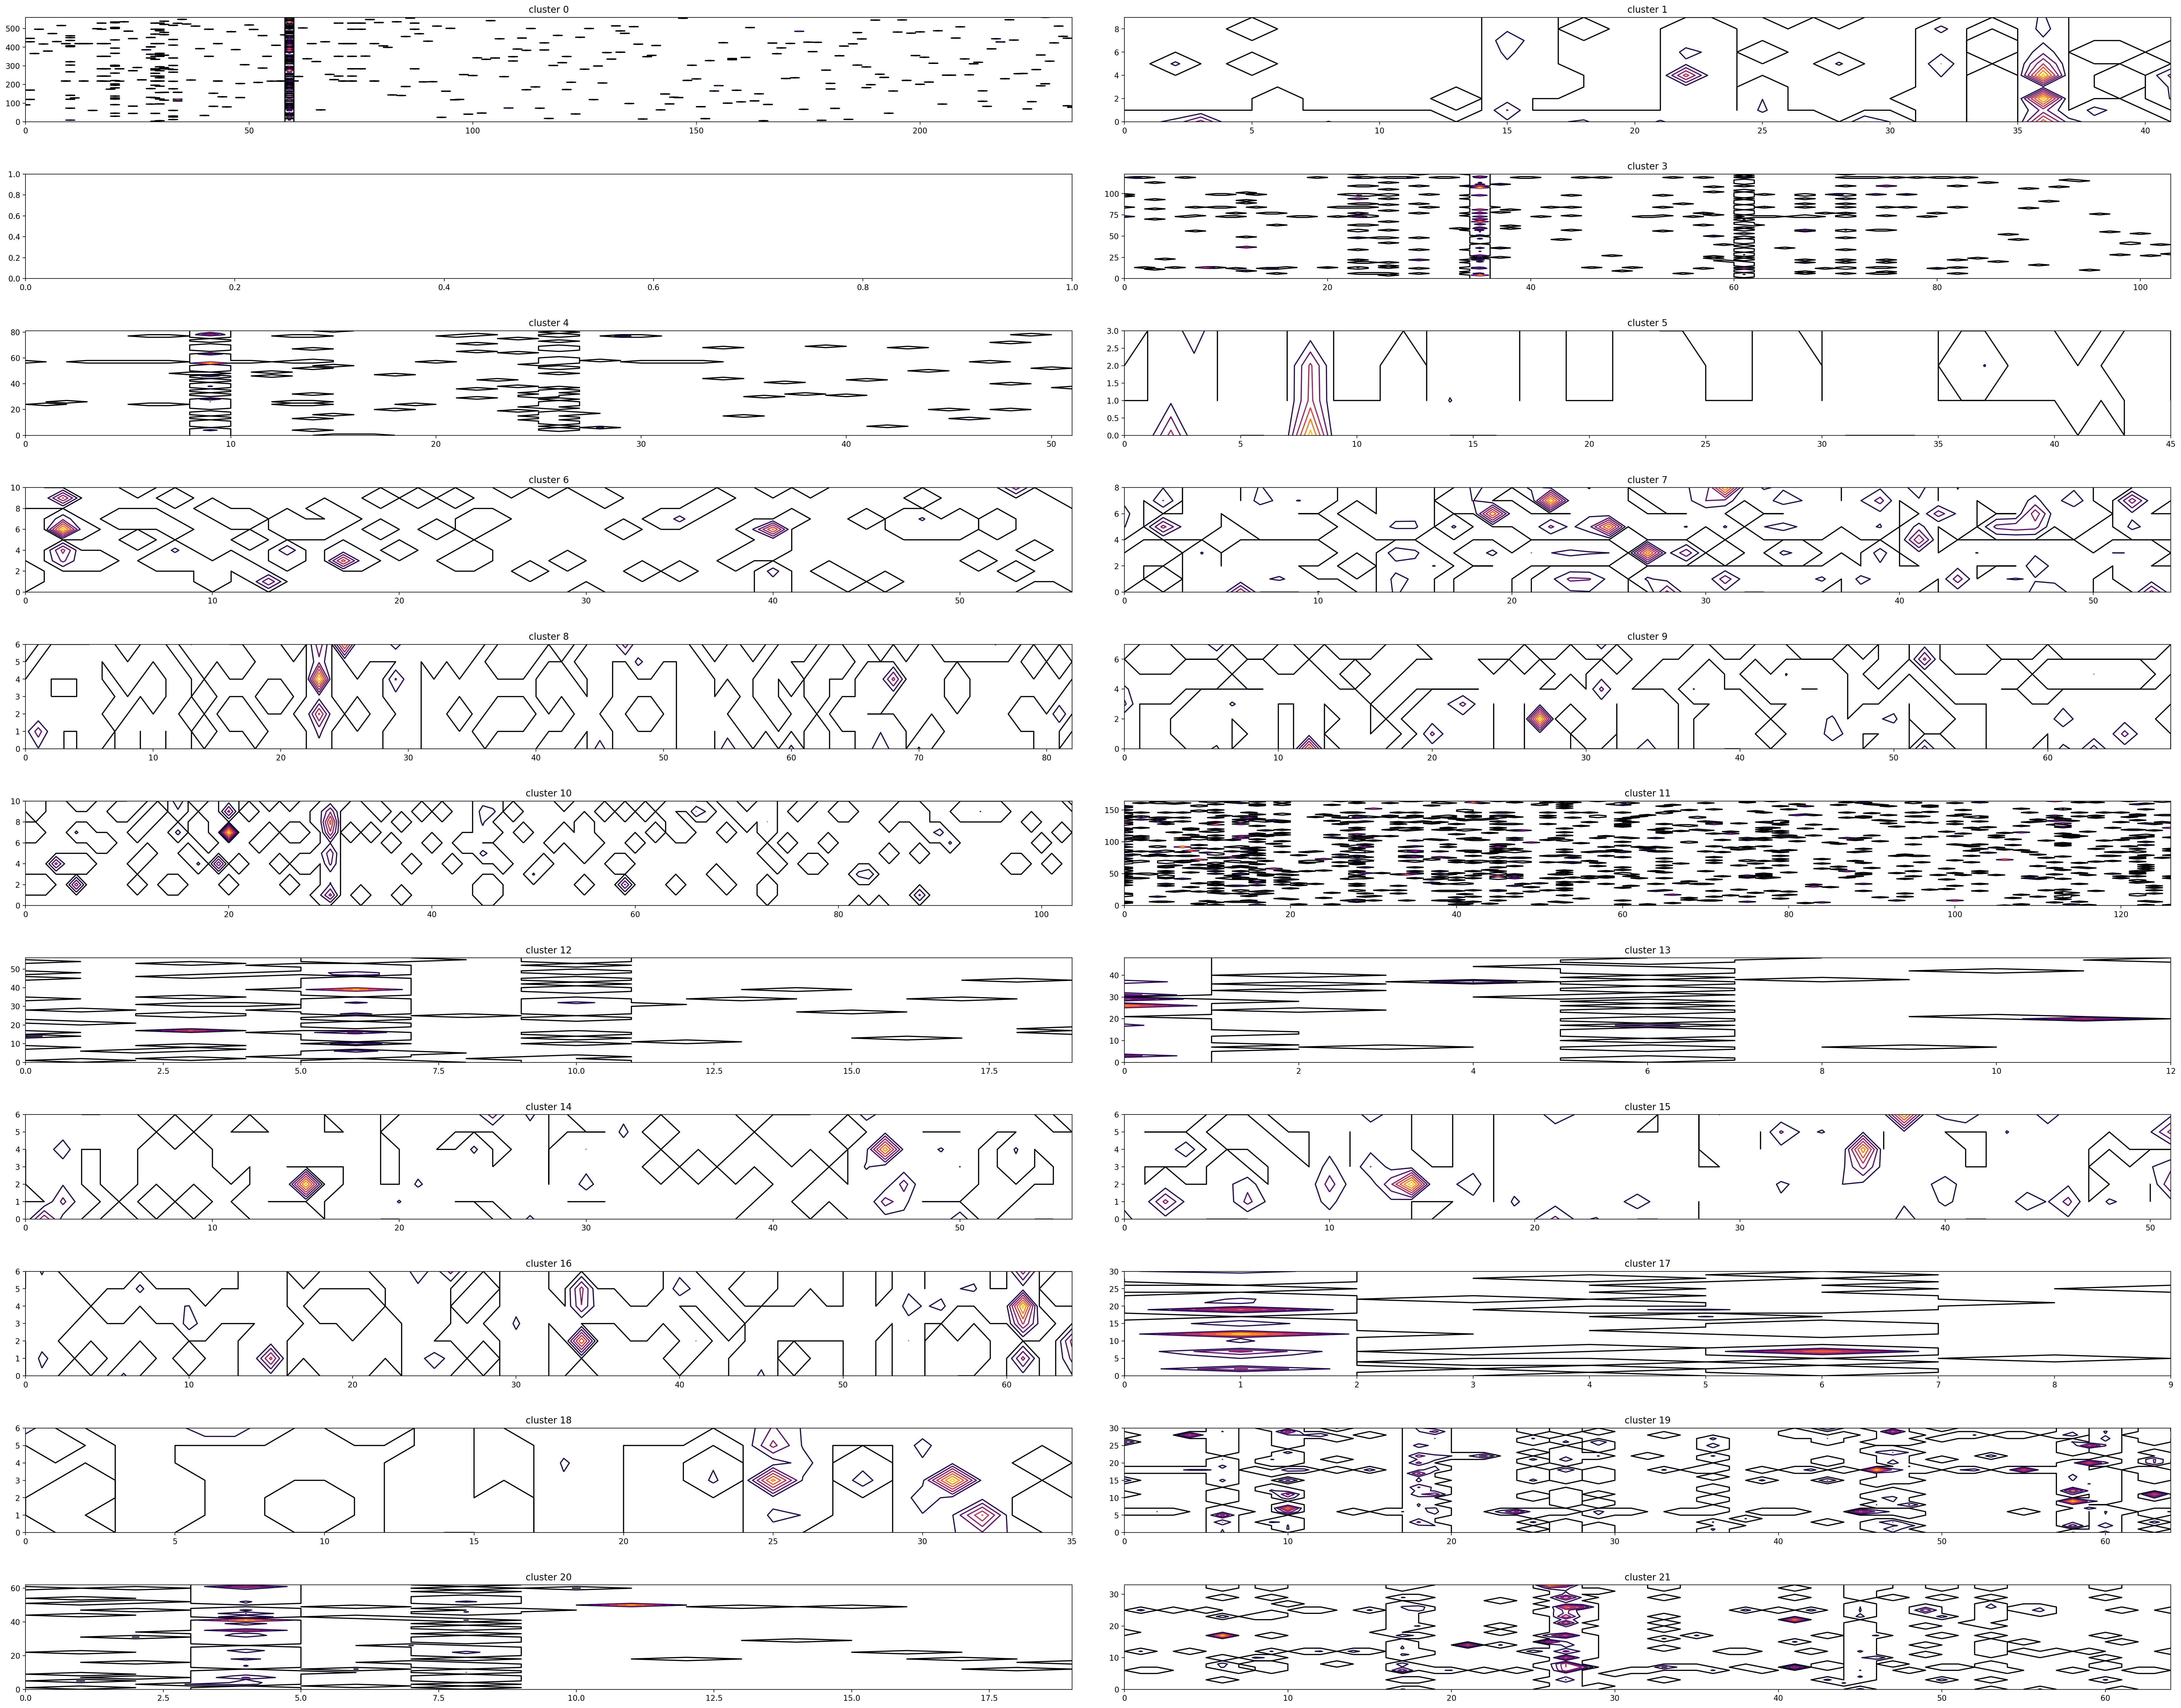

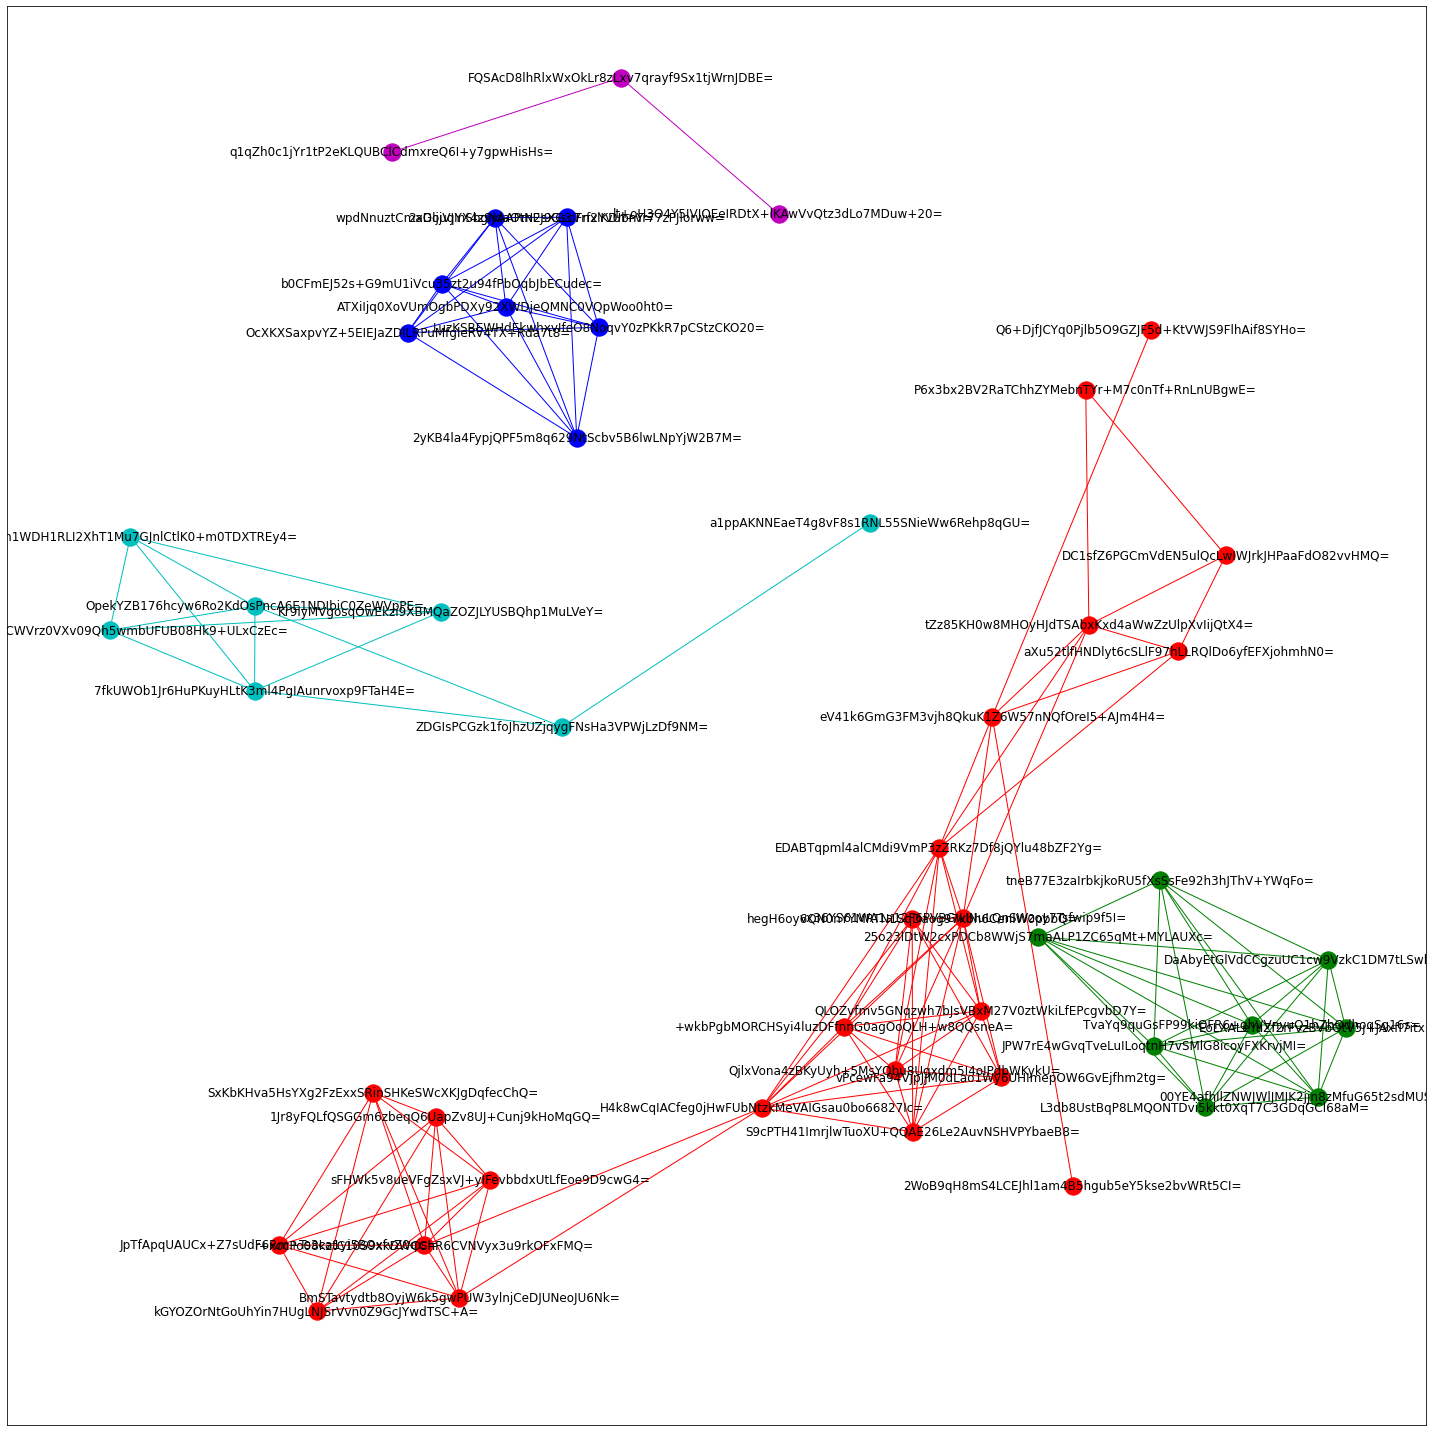

In [8]:
df = run_custom_ccd(df, output_path)